In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv('covid_policy_tracker.csv', na_values='', keep_default_na=False)
# Reemplaza los valores no asignados con 0
ds.fillna(0, inplace=True)

# Vista previa de los datos
# print(ds.confirmeddeaths.head())
print(ds.date.head())

# Listado de nombres de las variables
nombres_variables = ds.columns
print(nombres_variables)

# Convierte los datos temporales en formato 'calendario ISO proleptico' en 'serial date number'
#ds['date'] = pd.to_datetime(ds['load_date']).apply(lambda x: x.toordinal())
#print(ds.date.head())

#Suma total de casos acumuladas
ds['confirmedcases'].sum()
ds.confirmedcases.sum()

#Número de datos de un determinado pais
indices_filas_argentina = ds.iloc[:, 0] == 'Argentina'
filas_argentina = ds[indices_filas_argentina]
len(filas_argentina)



0    2020-01-01
1    2020-01-02
2    2020-01-03
3    2020-01-04
4    2020-01-05
Name: date, dtype: object
Index(['countryname', 'countrycode', 'date', 'c1_school_closing', 'c1_flag',
       'c2_workplace_closing', 'c2_flag', 'c3_cancel_public_events', 'c3_flag',
       'c4_restrictions_on_gatherings', 'c4_flag', 'c5_close_public_transport',
       'c5_flag', 'c6_stay_at_home_requirements', 'c6_flag',
       'c7_restrictions_on_internal_movement', 'c7_flag',
       'c8_international_travel_controls', 'e1_income_support', 'e1_flag',
       'e2_debt/contract_relief', 'e3_fiscal_measures',
       'e4_international_support', 'h1_public_information_campaigns',
       'h1_flag', 'h2_testing_policy', 'h3_contact_tracing',
       'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
       'm1_wildcard', 'confirmedcases', 'confirmeddeaths', 'stringencyindex',
       'stringencyindexfordisplay', 'legacystringencyindex',
       'legacystringencyindexfordisplay', 'iso_country', 'lo

938

In [6]:
#Crea una nueva estructura de datos eliminando los paises de los que se tengan menos de mil datos
ds = ds.groupby(ds.columns[0]).filter(lambda x: len(x) >1000)
print(ds.countryname.unique())

['Australia' 'Brazil' 'Canada' 'China' 'United Kingdom' 'India'
 'United States']


In [3]:
#Escoge las filas de un determinado pais
pais='Canada'
ds = ds[ds['countryname'] == pais]
len(ds)

13132

In [5]:
#Escoge las filas de un determinado pais
ds = ds[ds['countryname'] == pais]

#Elimina las filas con fecha repetida
#ds = ds.drop_duplicates(subset=['date'])
#len(ds)

#Escoge las primeras 938 filas
ds1=ds.iloc[0:938]
ds2=ds.iloc[939:1877]
len(ds)

13132

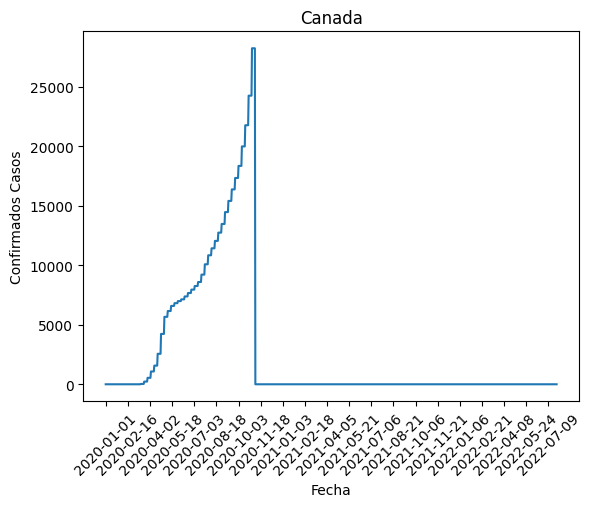

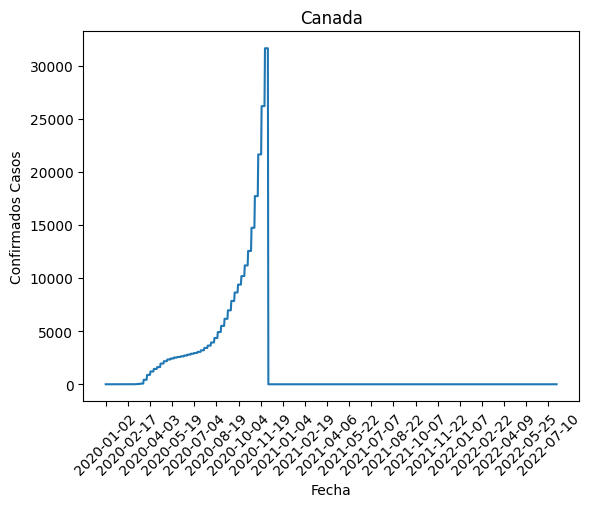

In [7]:
# Toma la columna 'load_date' como coordenadas x y 'confirmeddeaths' como datos y
datos_x = ds1['date']
#datos_y = ds1['confirmeddeaths']
datos_y = ds1['confirmedcases']
# Traza los datos
plt.plot(datos_x, datos_y)
plt.xlabel('Fecha')
plt.ylabel('Confirmados Casos')
plt.title(pais)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor visualización
plt.xticks(ticks=ds1['date'].iloc[::len(ds1['date']) // 20])
plt.show()

# Toma la columna 'load_date' como coordenadas x y 'confirmeddeaths' como datos y
datos_x = ds2['date']
#datos_y = ds2['confirmeddeaths']
datos_y = ds2['confirmedcases']
# Traza los datos
plt.plot(datos_x, datos_y)
plt.xlabel('Fecha')
plt.ylabel('Confirmados Casos')
plt.title(pais)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor visualización
plt.xticks(ticks=ds2['date'].iloc[::len(ds2['date']) // 20])
plt.show()

In [10]:
ds{1:938}

SyntaxError: invalid syntax (3176512165.py, line 1)